<a href="https://colab.research.google.com/github/AkashArya96/Deep-Drowsiness/blob/main/Deep_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **Install and update Dependency**



In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117


Looking in indexes: https://download.pytorch.org/whl/cu117, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ultralytics/yolov5 
!pip install -r yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15672, done.
remote: Total 15672 (delta 0), reused 0 (delta 0), pack-reused 15672
Receiving objects: 100% (15672/15672), 14.43 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (10745/10745), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.1/585.1 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 27.7 MB/s eta 0:00:00


In [ ]:
!cd yolov5 

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

**Load Model**

In [ ]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-15 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 81.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

**Make Detection**

In [ ]:
img = 'https://thenewswheel.com/wp-content/uploads/2019/12/Traffic-Kim-Scarborough-via-Flikr-760x540.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 540x760 20 cars, 2 trains, 2 trucks
Speed: 833.5ms pre-process, 65.6ms inference, 35.0ms NMS per image at shape (1, 3, 480, 640)


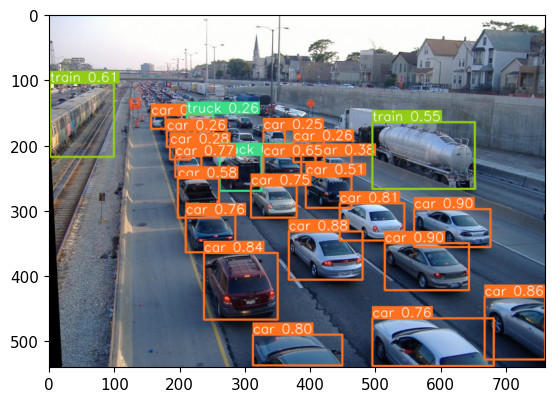

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[208, 217, 234],
         [208, 217, 234],
         [207, 216, 233],
         ...,
         [254, 254, 252],
         [254, 254, 252],
         [254, 254, 252]],
 
        [[208, 217, 234],
         [208, 217, 234],
         [208, 217, 234],
         ...,
         [254, 254, 252],
         [254, 254, 252],
         [254, 254, 252]],
 
        [[208, 217, 234],
         [208, 217, 234],
         [208, 217, 234],
         ...,
         [254, 254, 252],
         [254, 254, 252],
         [254, 254, 252]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  5,   8,  17],
         [  4,   7,  16],
         [  4,   7,  14]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  6,   8,  20],
         [  5,   8,  17],
         [  5,   8,  15]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  6,   8,  20],
  

**REAL TIME DETECTION**

In [ ]:
cap = cv2.VideoCapture(0)
cnt =0

# Create a folder to store frames
os.makedirs("/content/frames", exist_ok=True)

while cap.isOpened():
    ret, frame = cap.read()
    print(ret)
    if ret == False:
      break

    # Make Detections
    results = model(frame)

    cv2.imwrite(f"/content/frames/frame{cnt}.jpg",np.squeeze(results.render()))
    cnt+=1

    # cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
import os

**Train From Scratch**

In [ ]:
import uuid  # Unique Identifier
import os
import time

In [ ]:
ap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
base_dir = '/content/sample_data/data/images'
IMAGE_PATH = os.path.join('sample_data','data','images')
labels = ['awake','drowsy']
number_imgs = 20

In [ ]:
os.path.join(IMAGE_PATH,label+'.'+str(uuid.uuid1())+'.jpg')

'sample_data/data/images/awake.d4acc22e-f2e7-11ed-9f76-0242ac1c000c.jpg'

In [ ]:
for label in labels:
    print("Collecting images for {}".format(label))

In [ ]:
os.path.join(IMAGE_PATH+'/'+labels[0]+'.'+str(uuid.uuid1())+'.jpg')

'sample_data/data/images/awake.c60ca672-f2e6-11ed-9f76-0242ac1c000c.jpg'

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {},image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print

**Load Custom Model**

In [ ]:
!cd yolov5 && python '/content/drive/MyDrive/Deep Drowsiness/yolov5/train.py' --img 320 --batch 16 --epochs 500 --data "/content/drive/MyDrive/Deep Drowsiness/yolov5/dataset.yml" --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Deep Drowsiness/yolov5/dataset.yml, hyp=../drive/MyDrive/Deep Drowsiness/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=../drive/MyDrive/Deep Drowsiness/yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
fatal: cannot change to '/content/drive/MyDrive/Deep': No such file or directory
YOLOv5 🚀 2023-5-15 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Deep Drowsiness/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-15 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 


requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.


Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs


In [ ]:
img = os.path.join('data','images', 'awake.65b7adb9-f2ed-11ed-8157-e02be960ec11.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()